Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Classification Report:
              precision    recall  f1-score   support

  Technology       1.00      1.00      1.00         1
     Finance       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



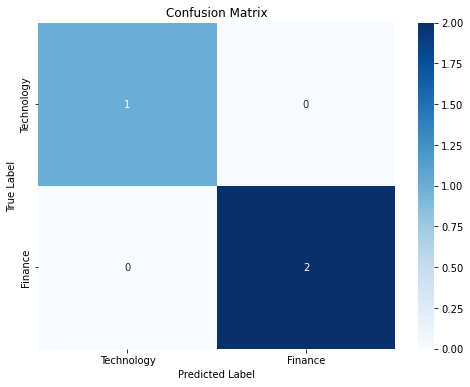

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Define custom data
documents = [
    "The new smartphone has amazing features and great battery life",
    "The stock market saw a significant drop today due to economic concerns",
    "The latest tech gadget is a breakthrough in artificial intelligence",
    "Investors are wary of the upcoming financial regulations",
    "The software update includes new performance enhancements",
    "The new budget proposal aims to reduce corporate taxes",
    "Technology companies are advancing rapidly in machine learning",
    "The market is reacting to the recent interest rate changes",
    "The new tablet has an excellent display and fast processor",
    "The government announced new economic stimulus measures"
]

labels = ["Technology", "Finance", "Technology", "Finance", "Technology", "Finance", "Technology", "Finance", "Technology", "Finance"]

# Map labels to numeric values
label_mapping = {"Technology": 0, "Finance": 1}
labels_numeric = [label_mapping[label] for label in labels]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(documents, labels_numeric, test_size=0.3, random_state=42)

# Initialize the CountVectorizer and transform the text data to feature vectors
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize the Naïve Bayes classifier
model = MultinomialNB()

# Train the classifier
model.fit(X_train_vec, y_train)

# Make predictions
y_pred = model.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred, target_names=label_mapping.keys())

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print('Classification Report:')
print(report)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=list(label_mapping.values()))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()